<a href="https://colab.research.google.com/github/Jeevinee/CodeClauseInternship_StockPrice/blob/main/Yahoo_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df=pd.read_excel("/content/yahoo_data.xlsx")
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
std,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08


In [7]:
import plotly.express as px
f=px.line(df,x='Date',y='Close*')
f.show()

In [28]:
fo=px.line(df,x='Date',y='Open')
fo.show()

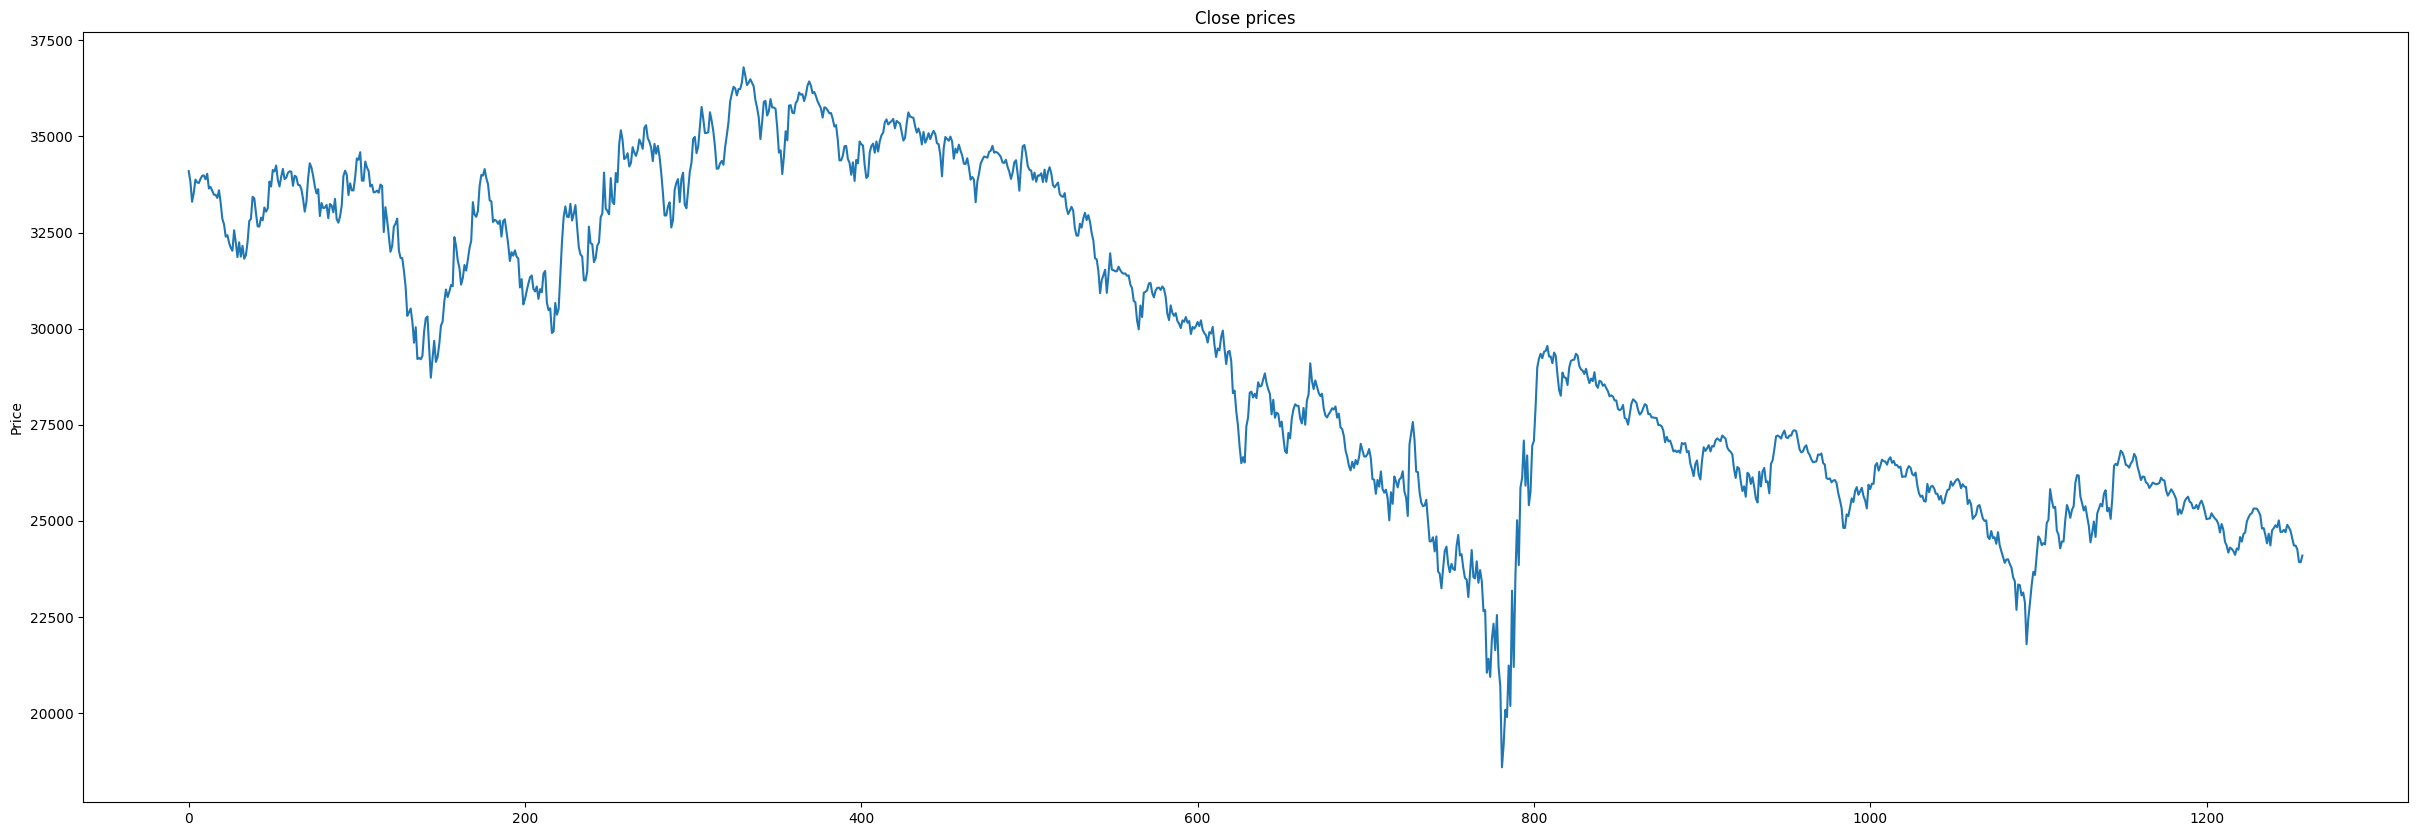

In [8]:
plt.figure(figsize=(30,10))
plt.plot(df['Close*'])
plt.title('Close prices')
plt.ylabel('Price')
plt.show()

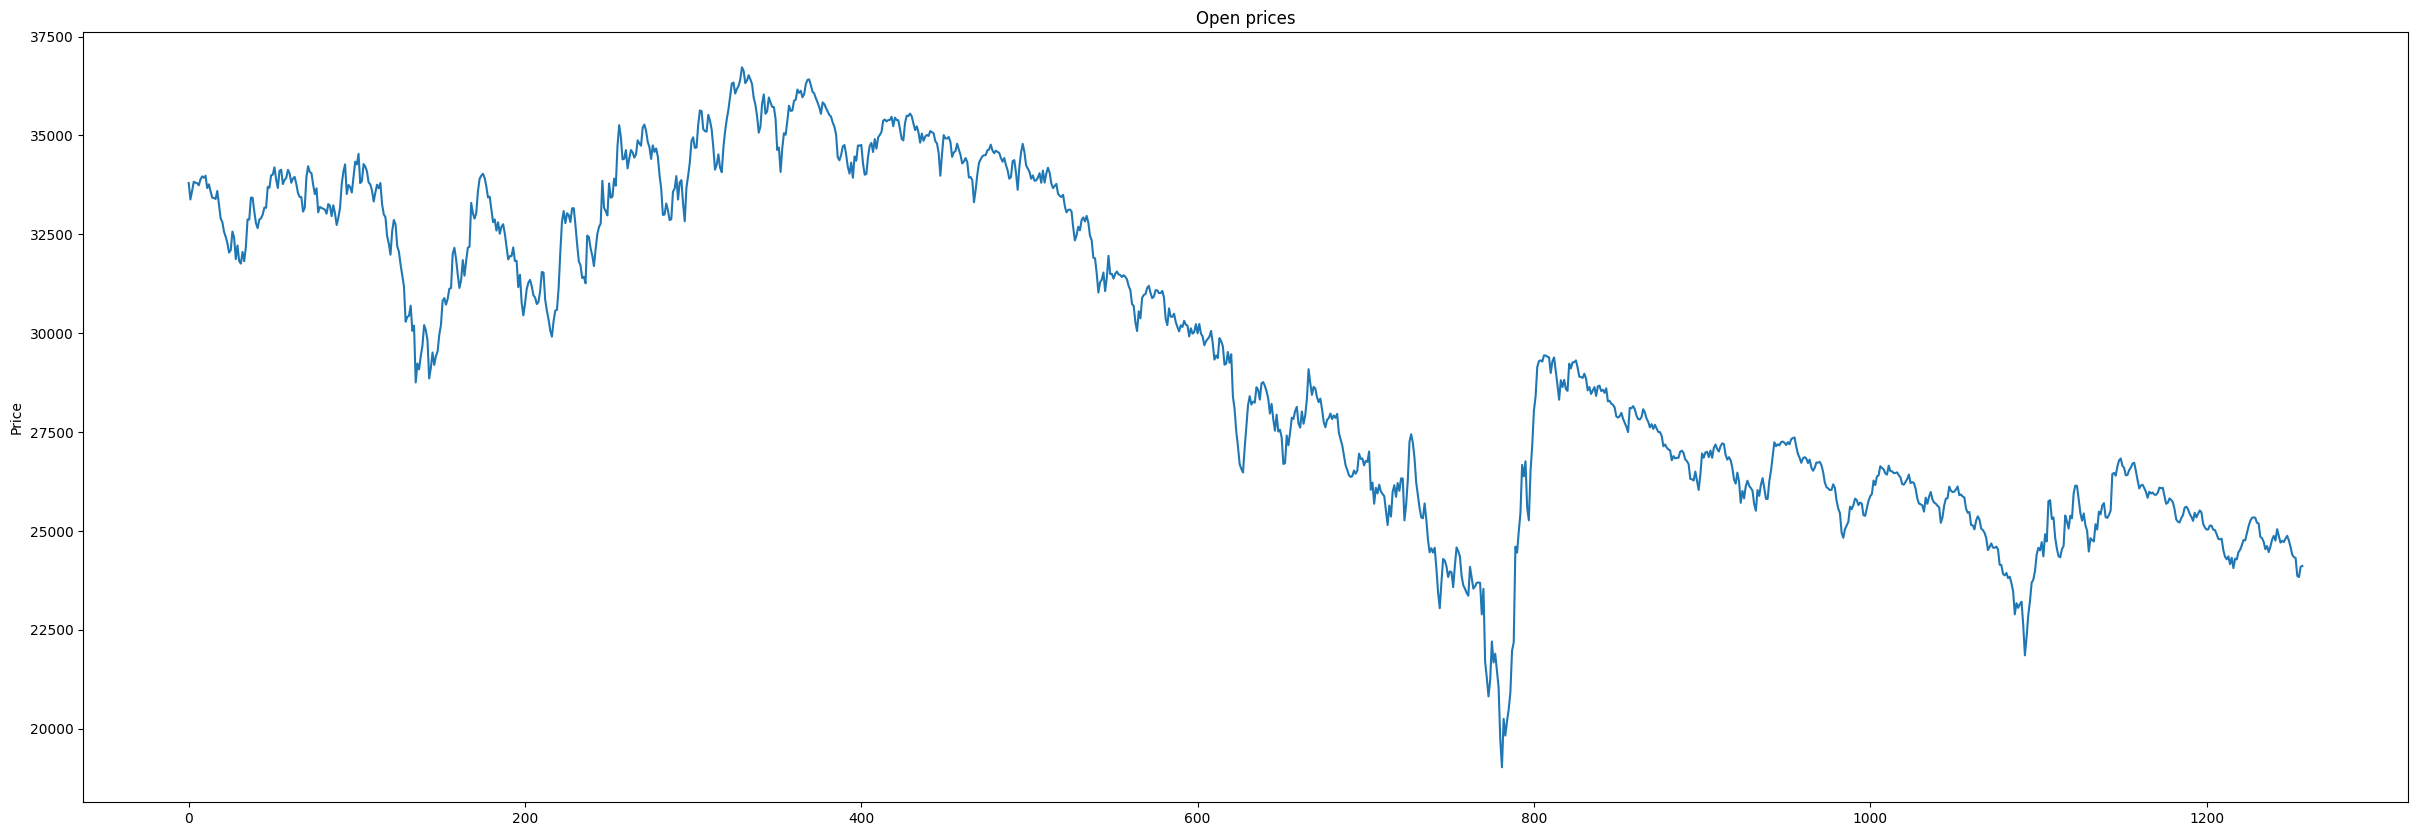

In [29]:
plt.figure(figsize=(30,10))
plt.plot(df['Open'])
plt.title('Open prices')
plt.ylabel('Price')
plt.show()

In [9]:
vol=df[['Date','Volume']].copy()

<Axes: xlabel='Date'>

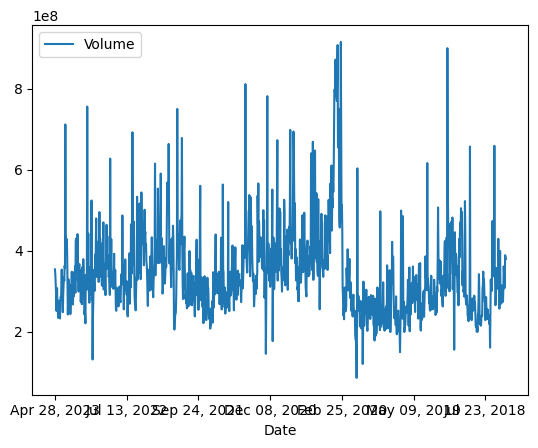

In [17]:
vol.plot(x='Date',y='Volume',kind='line')

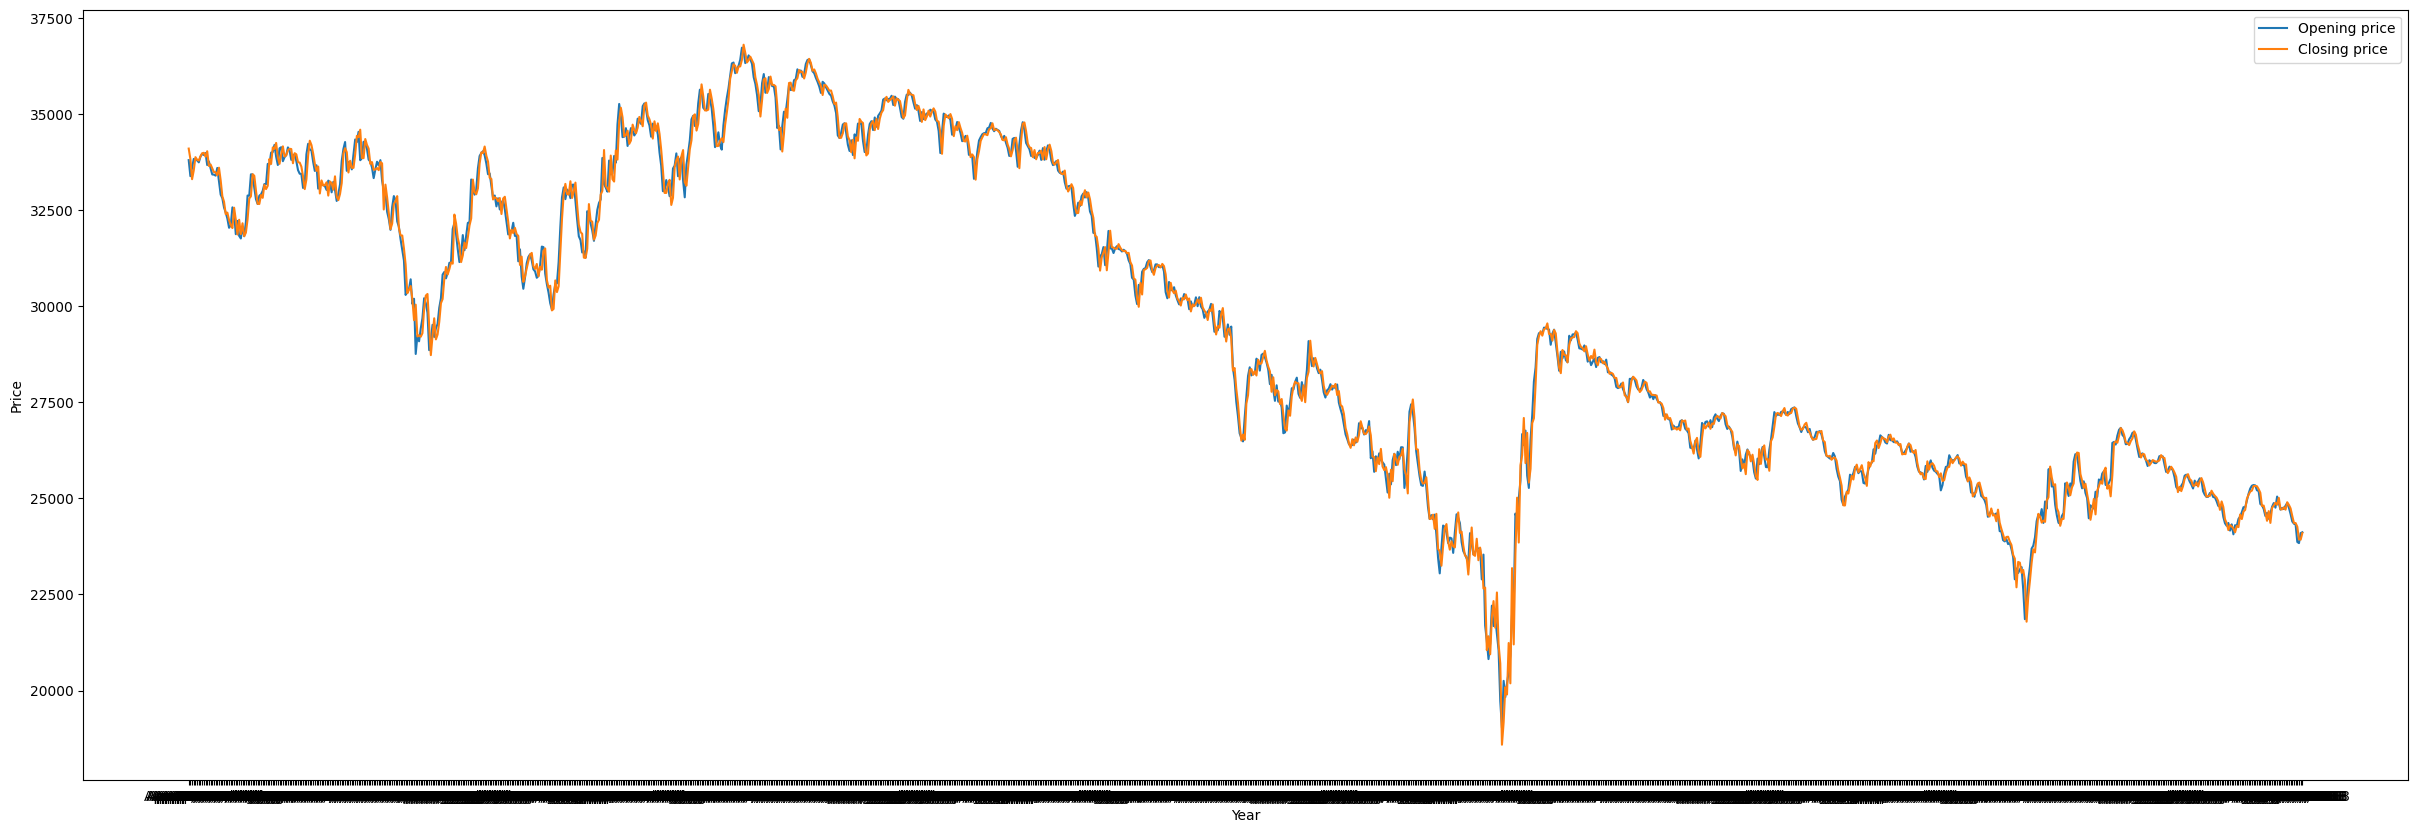

In [20]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'],df['Open'],label='Opening price')
plt.plot(df['Date'],df['Close*'],label='Closing price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

In [21]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [22]:
df['Date'].unique()

array(['Apr 28, 2023', 'Apr 27, 2023', 'Apr 26, 2023', ...,
       'May 03, 2018', 'May 02, 2018', 'May 01, 2018'], dtype=object)

In [23]:
df['Date']=pd.to_datetime(df['Date']).dt.date

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [30]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [31]:
X=df[['Open','High','Low','Volume']]
X=X[:int(len(df)-1)]
y=df['Close*']
y=y[:int(len(df)-1)]
model.fit(X,y)

RandomForestRegressor()

In [32]:
pred=model.predict(X)
pred

array([34070.918 , 33802.8347, 33352.0697, ..., 24187.0521, 23830.242 ,
       23954.0394])

In [33]:
print("Model score: ",model.score(X,y))

Model score:  0.9997230191261608


In [35]:
new_data=df[['Open','High','Low','Volume']].tail(1)
pred=model.predict(new_data)
pred

array([23919.9142])

In [36]:
actual=df[['Close*']].tail(1).values[0][0]
actual

24099.05

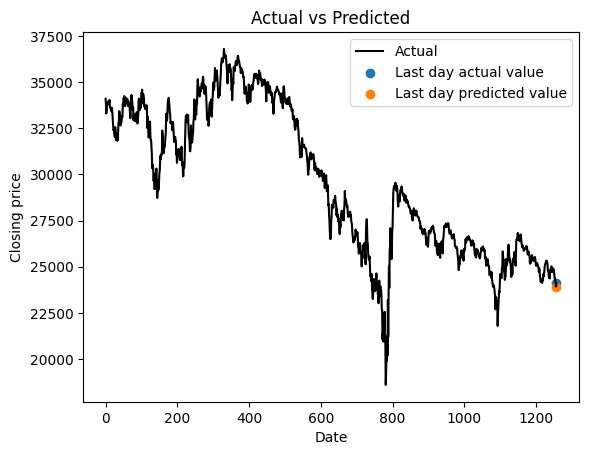

In [38]:
plt.plot(df.index,df['Close*'],label='Actual',color='black')
plt.scatter(df.index[-1],actual,label='Last day actual value')
plt.scatter(df.index[-1],pred,label='Last day predicted value')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
pred=model.predict(X)
mse=mean_squared_error(y,pred)
mae=mean_absolute_error(y,pred)
r2=r2_score(y,pred)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R squared: ",r2)

Mean squared error:  4441.58752940579
Mean absolute error:  43.67418154335743
R squared:  0.9997230191261608
